In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.set_random_seed(777)

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000011BE4A7C128>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000011BE4A7C2E8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000011BE765FCF8>)

In [5]:
nb_classes = 10

In [6]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [7]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Hypothesis(using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [9]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))

In [10]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [11]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch : 0001, Cost : 2.826302768
Epoch : 0002, Cost : 1.061668987
Epoch : 0003, Cost : 0.838061331
Epoch : 0004, Cost : 0.733232760
Epoch : 0005, Cost : 0.669279897
Epoch : 0006, Cost : 0.624611842
Epoch : 0007, Cost : 0.591160358
Epoch : 0008, Cost : 0.563869002
Epoch : 0009, Cost : 0.541745185
Epoch : 0010, Cost : 0.522673588
Epoch : 0011, Cost : 0.506782329
Epoch : 0012, Cost : 0.492447648
Epoch : 0013, Cost : 0.479955845
Epoch : 0014, Cost : 0.468893673
Epoch : 0015, Cost : 0.458703488
Learning finished
Accuracy :  0.8951
Label:  [2]
Prediction:  [2]


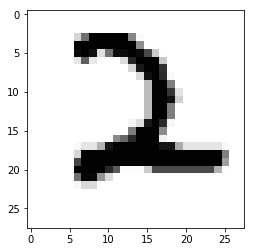

In [16]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    # Training Cycle
    for epoch in range(num_epochs) :
        avg_cost = 0
        
        for i in range(num_iterations) :
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], {X : batch_xs, Y : batch_ys})
            avg_cost += cost_val / num_iterations
            
        print("Epoch : {:04d}, Cost : {:.9f}".format(epoch+1, avg_cost))
    
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy : ", 
          accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()